In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = pd.read_csv('smallest_data.csv')
data

,ResponseID,CrossingSignal,NumberOfCharacters,Saved,LeftHand,Man,Woman,Pregnant,Stroller,OldMan,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,FuBqcfGjNSZTGLmJL,2,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,FuBqcfGjNSZTGLmJL,0,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FuBqbkH5834oodYJA,0,5.0,1,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,FuBqbkH5834oodYJA,0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,FuBq4j5Kw9tYatn35,0,2.0,1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,FuATsrEumP5CwiYbv,2,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,FuATsrEumP5CwiYbv,0,5.0,1,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
498,FuATi7Fkcm4zHXxo2,0,4.0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
499,FuATi7Fkcm4zHXxo2,0,4.0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [5]:
class Neuralstructure:
    """
    input_size: number of input nodes
    layers: number of hidden layers
    nodes_per_layer: number of nodes per hidden layer
    output_size: number of output nodes

    """
    def __init__(self):
        self.input_size = 24
        self.layers = 3
        self.nodes_per_layer = [16,9,3]
        self.output_size = 1
        self.weights = []
        self.bias = np.random.rand()
        self.init_weights()
    
    def init_weights(self):
        for i in range(self.layers):
            if i == 0:
                self.weights.append(np.around(np.random.rand(self.input_size, self.nodes_per_layer[i]), 3))
            else:
                self.weights.append(np.around(np.random.rand(self.nodes_per_layer[i-1], self.nodes_per_layer[i]), 3))
        self.weights.append(np.around(np.random.rand(self.nodes_per_layer[self.layers-1], self.output_size), 3))
    

In [6]:
class Neuralimage :
    def __init__(self, structure, weights, bias, activation_func) :
        self.structure = structure
        self.weights = weights
        self.weight_list = [item for row in self.weights for item in row]
        self.weight_list = [item for row in self.weight_list for item in row]
        self.bias = bias
        self.weight_dict = {}
        self.activation_func = activation_func
        self.image = self.generate_image()
        

    def generate_image(self):
        layer_x_val = [(i + 1) for i in range(len(self.structure))]
        layer_y_val = []
        for i in range(len(self.structure)):
            layer_y_val.append([j + 1 for j in range(self.structure[i])])

        for x in layer_x_val:
            for y in layer_y_val[x - 1]:
                plt.scatter(x*2, y, color='lightblue', s = 400, alpha=1)
                plt.text(x*2, y, f'{y}', fontsize=12, ha='right')

        line = 0 
        for x in range(len(layer_x_val)):
            for y in range(len( layer_y_val[x])):
                if x + 1 < len(layer_x_val):
                    for z in range(len(layer_y_val[x + 1])):

                        plt.plot([(x + 1)*2, (x + 2)*2], [layer_y_val[x][y], layer_y_val[x + 1][z]], color='black', alpha=0.5, linewidth=2)
                        plt.text((x + 1 + x + 2) , (layer_y_val[x][y] + layer_y_val[x + 1][z]) / 2,  'W' + str(line)+ '=' + f'{self.weight_list[line]}', fontsize=8, ha='right') #TODO: add the weigth labels casue probelems
                        self.weight_dict['W' + str(line)] = self.weight_list[line]
                        line += 1
                    

        plt.title('Neural Network ' + self.activation_func)
        plt.xlabel('Layer')
        plt.ylabel('Neuron')
        plt.show()

        

        
        

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def ReLU(x):
    return np.maximum(0, x)

def ReLU_derivative(x):
    if x > 0:
        return 1
    else:
        return 0

In [8]:
class NeuralNetwork:
    def __init__(self, structure: Neuralstructure , learning_rate: float, function, error_function):
        self.structure = structure
        self.weights = structure.weights
        self.bias = structure.bias
        self.layers = structure.layers
        self.nodes_per_layer = structure.nodes_per_layer
        self.input_size = structure.input_size
        self.output_size = structure.output_size
        self.learning_rate = learning_rate
        self.outputs = []
        self.function = function
        self.error_function = error_function
        image_structure = self.nodes_per_layer
        image_structure.append(self.output_size)
        self.image = Neuralimage(image_structure, self.weights, self.bias, self.function)

    def get_weights_dict(self):
        return self.image.weight_dict
    
    def relu_feed_forward(self, inputs):
        self.outputs = []
        for i in range(self.layers + 1):
            if i == 0:
                self.outputs.append(ReLU(np.dot(inputs, self.weights[i]) + self.bias))
            else:
                self.outputs.append(ReLU(np.dot(self.outputs[i - 1], self.weights[i]) + self.bias))
        return self.outputs
    
    def sigmoid_feed_forward(self, inputs):
        self.outputs = []
        for i in range(self.layers + 1):
            if i == 0:
                self.outputs.append(sigmoid(np.dot(inputs, self.weights[i]) + self.bias))
            else:
                self.outputs.append(sigmoid(np.dot(self.outputs[i - 1], self.weights[i]) + self.bias))
        return self.outputs
    
    def relu_backward_pass(self, inputs, expected):
        for i in range(self.layers + 1, 0, -1):
            if i == self.layers + 1:
                error = expected - self.outputs[i]
                delta = error * ReLU_derivative(self.outputs[i])
                self.weights[i - 1] += np.dot(self.outputs[i - 1].T, delta) * self.learning_rate
            else:
                error = np.dot(delta, self.weights[i].T)
                delta = error * ReLU_derivative(self.outputs[i])
                if i - 1 != 0:
                    self.weights[i - 1] += np.dot(self.outputs[i - 1].T, delta) * self.learning_rate
                else:
                    self.weights[i - 1] += np.dot(inputs.T, delta) * self.learning_rate
        return error

    def sigmoid_backward_pass(self, inputs, expected):
        for i in range(self.layers + 1, 0, -1):
            if i == self.layers + 1:
                error = expected - self.outputs[i]
                delta = error * sigmoid_derivative(self.outputs[i])
                self.weights[i - 1] += np.dot(self.outputs[i - 1].T, delta) * self.learning_rate
            else:
                error = np.dot(delta, self.weights[i].T)
                delta = error * sigmoid_derivative(self.outputs[i])
                if i - 1 != 0:
                    self.weights[i - 1] += np.dot(self.outputs[i - 1].T, delta) * self.learning_rate
                else:
                    self.weights[i - 1] += np.dot(inputs.T, delta) * self.learning_rate
        return error
  
    def signle_train(self, input, expected, function):
        if function == 'relu':
            self.relu_train(input, expected)
        else:
            self.sigmoid_train(input, expected)
    
    def relu_train(self, input, expected):
        self.relu_feed_forward(input)
        self.relu_backward_pass(input, expected)

    def sigmoid_train(self, input, expected):
        self.sigmoid_feed_forward(input)
        self.sigmoid_backward_pass(input, expected)

        

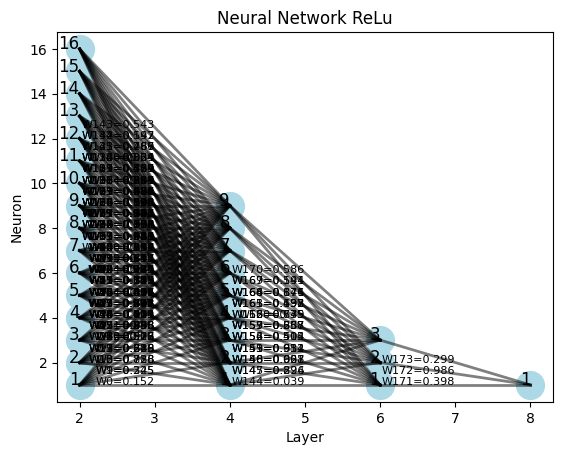

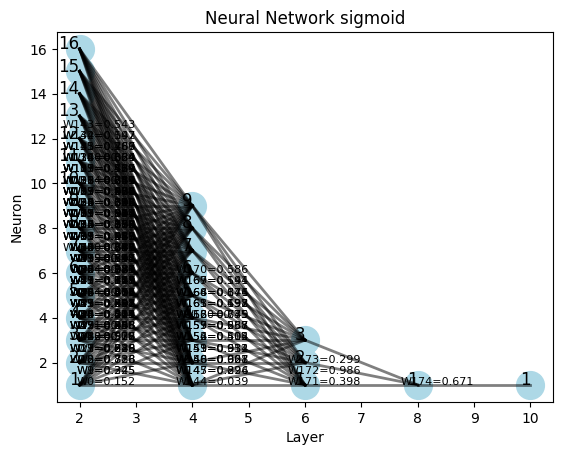

In [9]:
structure = Neuralstructure()
relu_network = NeuralNetwork(structure, 0.01, 'ReLu', 'mean_squared_error')
sigmoid_network = NeuralNetwork(structure, 0.01, 'sigmoid', 'mean_squared_error')

In [10]:
input = data[['CrossingSignal', 'NumberOfCharacters', 'Saved',
       'LeftHand', 'Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan',
       'OldWoman', 'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan',
       'Criminal', 'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete',
       'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat']]

input = input[0:1].to_numpy()


In [11]:
print(relu_network.relu_feed_forward(input[0]))
sigmoid_network.sigmoid_feed_forward(input[0])

[array([1.50706988, 2.51706988, 3.48506988, 2.37806988, 2.86606988,
       2.76506988, 3.31006988, 2.54606988, 2.89606988, 1.44506988,
       2.44206988, 2.07706988, 2.05106988, 1.61906988, 1.64806988,
       2.09406988]), array([29.95345077, 21.24648106, 19.85466325, 16.25698508, 19.50866968,
       20.94660914, 14.63851822, 17.77259676, 20.96682583]), array([ 78.5650607 ,  95.46806559, 113.54778055]), array([197.36478135])]


[array([0.81862656, 0.92532985, 0.97025996, 0.91513966, 0.94614344,
        0.94075882, 0.96477266, 0.92730904, 0.94765181, 0.80923852,
        0.9199796 , 0.88865443, 0.88605568, 0.83466681, 0.83863002,
        0.89032546]),
 array([0.99998942, 0.9997165 , 0.99963711, 0.99801437, 0.99942028,
        0.99967612, 0.99739516, 0.99907058, 0.99966293]),
 array([0.98124102, 0.9949412 , 0.99758316]),
 array([0.915499])]

In [13]:
relu_network.relu_backward_pass(input[0], 1)

IndexError: list index out of range